In [1]:
from selenium import webdriver as wd
import pandas as pd
from bs4 import BeautifulSoup

In [5]:
driver = wd.Chrome("C:\webdriver\chromedriver.exe")
url = "https://music.bugs.co.kr/chart"
driver.get(url)

C:\Users\user\AppData\Local\Temp\ipykernel_2540\3395121640.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = wd.Chrome("C:\webdriver\chromedriver.exe")


In [34]:
trs = driver.find_elements_by_css_selector('#CHARTrealtime > table > tbody > tr')

rank = {'서비스': [],
        '순위': [],
        '제목': [],
        '가수': []
        }
for i in range(len(trs)):
    rank['서비스'].append("BucksMusic")
    rank['순위'].append(trs[i].find_element_by_css_selector('strong').text)
    rank['제목'].append(trs[i].find_element_by_class_name('title').text)
    rank['가수'].append(trs[i].find_element_by_class_name('artist').text)
print(rank)

C:\Users\user\AppData\Local\Temp\ipykernel_14272\823411443.py:1: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  trs = driver.find_elements_by_css_selector('#CHARTrealtime > table > tbody > tr')
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\selenium\webdriver\remote\webelement.py:484: UserWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  warnings.warn("find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead")
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\selenium\webdriver\remote\webelement.py:446: UserWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  warnings.warn("find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead

{'서비스': ['BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic', 'BucksMusic

In [35]:
pd_df = pd.DataFrame(rank)
pd_df

,서비스,순위,제목,가수
0,BucksMusic,1,팡파레,다비치
1,BucksMusic,2,LOVE DIVE,IVE (아이브)
2,BucksMusic,3,천왕성,이수영
3,BucksMusic,4,TOMBOY,(여자)아이들
4,BucksMusic,5,That That (prod. & feat. SUGA of BTS),싸이 (PSY)
...,...,...,...,...
95,BucksMusic,96,TOMBOY,혁오 (HYUKOH)
96,BucksMusic,97,Permission to Dance,방탄소년단
97,BucksMusic,98,Celebrity,아이유(IU)
98,BucksMusic,99,Rainbow,이수영


In [6]:
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

In [10]:
## 곡정보 얻기
songs = soup.select('table.list > tbody > tr')
len(songs)

100

In [11]:
## 곡정보 확인
songs[0]

<tr albumid="20468120" artistid="80041466" multiartist="N" mvid="608363" rowtype="track" trackid="32542643">
<input name="_isStream" type="hidden" value="32542643"/>
<input name="_isDown" type="hidden" value="32542643"/>
<td class="check"><input buyminquality="T" disc_id="1" name="check" title="팡파레" type="checkbox" value="32542643"/></td>
<td>
<div class="ranking">
<strong>1</strong>
<p class="change none"><em>0</em><span>변동없음</span></p>
</div>
</td>
<td>
<a class="thumbnail" href="https://music.bugs.co.kr/album/20468120?wl_ref=list_tr_07_chart" onclick="
">
<span class="mask"></span>
<img alt="Season Note 대표이미지" onerror="bugs.utils.imgError(this);" src="https://image.bugsm.co.kr/album/images/50/204681/20468120.jpg?version=20220518014558.0"/>
</a>
</td>
<td>
<a class="trackInfo" href="https://music.bugs.co.kr/track/32542643?wl_ref=list_tr_08_chart" onclick="
">곡정보</a>
</td>
<th scope="row">
<p adult_yn="N" class="title">
<a adultcheckval="1" aria-label="새창" href="javascript:;" onclick=

In [21]:
## 곡 제목 찾기
song = songs[0]
title = song.select('p.title > a')[0]
title.text

'팡파레'

In [23]:
## 가수 이름 찾기
artist = song.select('p.artist > a')[0]
artist.text

'다비치'

In [ ]:
songs = soup.select('table.byChart > tbody > tr')
for song in songs:
    title = song.select('p.title > a')[0].text
    singer = song.select('p.artist > a')[0].text
    print(title, singer, sep="|")

In [ ]:
## 반복문 사용하여 song_data를 저장
song_data = []
rank = 1
songs = soup.select('table.byChart > tbody > tr')
for song in songs:
    title = song.select('p.title > a')[0].text
    singer = song.select('p.artist > a')[0].text
    song_data.append(['Bugs', rank, title, singer])
    rank = rank + 1
song_data

In [27]:
import pandas as pd
df_cols = ['서비스', '순위', '제목', '가수']
pd_df = pd.DataFrame(song_data, columns=df_cols)
pd_df.info()
pd_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     100 non-null    object
 1   순위      100 non-null    int64 
 2   제목      100 non-null    object
 3   가수      100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


,서비스,순위,제목,가수
0,Bugs,1,팡파레,다비치
1,Bugs,2,LOVE DIVE,IVE (아이브)
2,Bugs,3,천왕성,이수영
3,Bugs,4,TOMBOY,(여자)아이들
4,Bugs,5,That That (prod. & feat. SUGA of BTS),싸이 (PSY)


In [28]:
## 크롤링 결과를 엑셀로 저장
pd_df.to_excel("data/bugs.xlsx", index=False)

In [48]:
## 지니 차트
driver = wd.Chrome("C:\webdriver\chromedriver.exe")
url = "https://genie.co.kr/chart/top200"
driver.get(url)

C:\Users\user\AppData\Local\Temp\ipykernel_2540\2717540072.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = wd.Chrome("C:\webdriver\chromedriver.exe")


In [49]:
trs = driver.find_elements_by_css_selector('#body-content > div.newest-list > div > table > tbody > tr')
# trs[0].find_element_by_class_name('number').text
# trs[0].find_element_by_class_name('title').text
# trs[0].find_element_by_class_name('artist').text
rank = 1
song_data = []
for song in trs:
    title = song.find_element_by_class_name('title').text
    singer = song.find_element_by_class_name('artist').text
    song_data.append(['Genie', rank, title, singer])
    rank = rank + 1
driver.find_element_by_css_selector('#body-content > div.page-nav.rank-page-nav > a:nth-child(2)').click()
trs = driver.find_elements_by_css_selector('#body-content > div.newest-list > div > table > tbody > tr')
for song in trs:
    title = song.find_element_by_class_name('title').text
    singer = song.find_element_by_class_name('artist').text
    song_data.append(['Genie', rank, title, singer])
    rank = rank + 1
song_data


C:\Users\user\AppData\Local\Temp\ipykernel_2540\1303602389.py:1: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  trs = driver.find_elements_by_css_selector('#body-content > div.newest-list > div > table > tbody > tr')
C:\Users\user\AppData\Local\Temp\ipykernel_2540\1303602389.py:12: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('#body-content > div.page-nav.rank-page-nav > a:nth-child(2)').click()
C:\Users\user\AppData\Local\Temp\ipykernel_2540\1303602389.py:13: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  trs = driver.find_elements_by_css_selector('#body-content > div.newest-list > div > table > tbody > tr')


[['Genie', 1, 'That That (Prod. & Feat. SUGA of BTS)', '싸이 (Psy)'],
 ['Genie', 2, 'TOMBOY', '(여자)아이들'],
 ['Genie', 3, 'LOVE DIVE', 'IVE (아이브)'],
 ['Genie', 4, '봄여름가을겨울 (Still Life)', 'BIGBANG (빅뱅)'],
 ['Genie', 5, '사랑은 늘 도망가', '임영웅'],
 ['Genie', 6, '사랑인가 봐', '멜로망스 (MeloMance)'],
 ['Genie', 7, '우리들의 블루스', '임영웅'],
 ['Genie', 8, '나의 X에게', '경서'],
 ['Genie', 9, 'Feel My Rhythm', 'Red Velvet (레드벨벳)'],
 ['Genie', 10, '다시 만날 수 있을까', '임영웅'],
 ['Genie', 11, '취중고백', '김민석 (멜로망스)'],
 ['Genie', 12, 'LOVE me', "BE'O (비오)"],
 ['Genie', 13, 'ZOOM', '제시'],
 ['Genie', 14, 'GANADARA (Feat. 아이유)', '박재범'],
 ['Genie', 15, '신호등', '이무진'],
 ['Genie', 16, '이제 나만 믿어요', '임영웅'],
 ['Genie', 17, '팡파레', '다비치'],
 ['Genie', 18, '무지개', '임영웅'],
 ['Genie', 19, '다정히 내 이름을 부르면', '경서예지 & 전건호'],
 ['Genie', 20, '아버지', '임영웅'],
 ['Genie', 21, 'Celeb', '싸이 (Psy)'],
 ['Genie', 22, '듣고 싶을까', 'MSG워너비 (M.O.M)'],
 ['Genie', 23, 'A bientot', '임영웅'],
 ['Genie', 24, '손이 참 곱던 그대', '임영웅'],
 ['Genie', 25, '사랑해 진짜', '임영웅'],
 ['Genie', 26, '사랑

In [50]:
import pandas as pd
df_cols = ['서비스', '순위', '제목', '가수']
pd_df = pd.DataFrame(song_data, columns=df_cols)
pd_df.info()
pd_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     100 non-null    object
 1   순위      100 non-null    int64 
 2   제목      100 non-null    object
 3   가수      100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


,서비스,순위,제목,가수
0,Genie,1,That That (Prod. & Feat. SUGA of BTS),싸이 (Psy)
1,Genie,2,TOMBOY,(여자)아이들
2,Genie,3,LOVE DIVE,IVE (아이브)
3,Genie,4,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
4,Genie,5,사랑은 늘 도망가,임영웅


In [77]:
driver = wd.Chrome("C:\webdriver\chromedriver.exe")
url = "https://genie.co.kr/chart/top200"
driver.get(url)

C:\Users\user\AppData\Local\Temp\ipykernel_2540\3529162540.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = wd.Chrome("C:\webdriver\chromedriver.exe")


In [78]:
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

In [79]:
## 곡정보 알아오기
songs = soup.select('table > tbody > tr')
len(songs)

50

In [80]:
song = songs[0]
title = song.select('a.title')[0]
title.text.strip()

'That That (Prod. & Feat. SUGA of BTS)'

In [81]:
singer = song.select('a.artist')[0]
singer.text.strip()

'싸이 (Psy)'

In [82]:
songs = soup.select('table > tbody > tr')
for song in songs:
    title = song.select_one('a.title').text.strip()
    title = title.replace("19금","").strip()
    singer = song.select_one('a.artist').text.strip()
    print(title, singer, sep="|")

That That (Prod. & Feat. SUGA of BTS)|싸이 (Psy)
TOMBOY|(여자)아이들
LOVE DIVE|IVE (아이브)
봄여름가을겨울 (Still Life)|BIGBANG (빅뱅)
사랑은 늘 도망가|임영웅
사랑인가 봐|멜로망스 (MeloMance)
우리들의 블루스|임영웅
다시 만날 수 있을까|임영웅
Feel My Rhythm|Red Velvet (레드벨벳)
이제 나만 믿어요|임영웅
나의 X에게|경서
취중고백|김민석 (멜로망스)
LOVE me|BE'O (비오)
ZOOM|제시
GANADARA (Feat. 아이유)|박재범
무지개|임영웅
아버지|임영웅
다정히 내 이름을 부르면|경서예지 & 전건호
A bientot|임영웅
신호등|이무진
손이 참 곱던 그대|임영웅
듣고 싶을까|MSG워너비 (M.O.M)
INVU|태연 (TAEYEON)
사랑해 진짜|임영웅
사랑역|임영웅
팡파레|다비치
연애편지|임영웅
보금자리|임영웅
Celeb|싸이 (Psy)
Stay|The Kid LAROI & Justin Bieber
사랑해요 그대를|임영웅
인생찬가|임영웅
너의 모든 순간|성시경
언제나 사랑해|케이시 (Kassy)
MY BAG|(여자)아이들
ELEVEN|IVE (아이브)
회전목마 (Feat. Zion.T & 원슈타인) (Prod. by Slom)|sokodomo
FEARLESS|LE SSERAFIM (르세라핌)
정이라고 하자 (Feat. 10CM)|BIG Naughty (서동현)
감동이야 (Feat. 성시경)|싸이 (Psy)
strawberry moon|아이유 (IU)
abcdefu|GAYLE
Stronger (What Doesn't Kill You)|Kelly Clarkson
내 손을 잡아|아이유 (IU)
Celebrity|아이유 (IU)
너를 생각해|주시크 (Joosiq)
Next Level|aespa
That's Hilarious|Charlie Puth
리무진 (Feat. MINO) (Prod. by GRAY)|BE'O (비오)
Weekend|태연 (TAE

In [83]:
song_data = []
rank = 1
songs = soup.select('table > tbody > tr')
for song in songs:
    title = song.select_one('a.title').text.strip()
    title = title.replace("19금","").strip()
    singer = song.select_one('a.artist').text.strip()
    song_data.append(['Genie', rank, title, singer])
    rank = rank + 1
song_data

[['Genie', 1, 'That That (Prod. & Feat. SUGA of BTS)', '싸이 (Psy)'],
 ['Genie', 2, 'TOMBOY', '(여자)아이들'],
 ['Genie', 3, 'LOVE DIVE', 'IVE (아이브)'],
 ['Genie', 4, '봄여름가을겨울 (Still Life)', 'BIGBANG (빅뱅)'],
 ['Genie', 5, '사랑은 늘 도망가', '임영웅'],
 ['Genie', 6, '사랑인가 봐', '멜로망스 (MeloMance)'],
 ['Genie', 7, '우리들의 블루스', '임영웅'],
 ['Genie', 8, '다시 만날 수 있을까', '임영웅'],
 ['Genie', 9, 'Feel My Rhythm', 'Red Velvet (레드벨벳)'],
 ['Genie', 10, '이제 나만 믿어요', '임영웅'],
 ['Genie', 11, '나의 X에게', '경서'],
 ['Genie', 12, '취중고백', '김민석 (멜로망스)'],
 ['Genie', 13, 'LOVE me', "BE'O (비오)"],
 ['Genie', 14, 'ZOOM', '제시'],
 ['Genie', 15, 'GANADARA (Feat. 아이유)', '박재범'],
 ['Genie', 16, '무지개', '임영웅'],
 ['Genie', 17, '아버지', '임영웅'],
 ['Genie', 18, '다정히 내 이름을 부르면', '경서예지 & 전건호'],
 ['Genie', 19, 'A bientot', '임영웅'],
 ['Genie', 20, '신호등', '이무진'],
 ['Genie', 21, '손이 참 곱던 그대', '임영웅'],
 ['Genie', 22, '듣고 싶을까', 'MSG워너비 (M.O.M)'],
 ['Genie', 23, 'INVU', '태연 (TAEYEON)'],
 ['Genie', 24, '사랑해 진짜', '임영웅'],
 ['Genie', 25, '사랑역', '임영웅'],
 ['Genie', 26, 

In [84]:
import pandas as pd
df_cols = ['서비스', '순위', '제목', '가수']
pd_df = pd.DataFrame(song_data, columns=df_cols)
pd_df.to_excel("data/genie.xlsx",index=False)

In [85]:
### Excel_Merge
excel_names = ["data/bugs.xlsx", "data/genie.xlsx", "data/melon.xlsx"]

appended_data = pd.DataFrame()
for name in excel_names:
    pd_df = pd.read_excel(name)
    appended_data = appended_data.append(pd_df)

C:\Users\user\AppData\Local\Temp\ipykernel_2540\240459676.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_data = appended_data.append(pd_df)
C:\Users\user\AppData\Local\Temp\ipykernel_2540\240459676.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_data = appended_data.append(pd_df)
C:\Users\user\AppData\Local\Temp\ipykernel_2540\240459676.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_data = appended_data.append(pd_df)


In [86]:
appended_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     250 non-null    object
 1   순위      250 non-null    int64 
 2   제목      250 non-null    object
 3   가수      250 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [87]:
appended_data.to_excel("data/total.xlsx","가요순위",index=False)

In [4]:
### 유튜브 순위 크롤링
driver = wd.Chrome("C:\webdriver\chromedriver.exe")
url = "https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube"
driver.get(url)

C:\Users\user\AppData\Local\Temp\ipykernel_11152\3025425227.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = wd.Chrome("C:\webdriver\chromedriver.exe")


In [ ]:
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')
soup

In [44]:
contents = soup.select('table > tbody > tr.aos-init')
#contents[0].text.strip().replace("\n","").replace("\t","")

you_contents = []
for content in contents:
    title = content.select('td.subject > h1 > a')[0].text.strip()
    category = content.select('.category')[0].text.strip()
    subscriber = content.select('.subscriber_cnt')[0].text.strip()
    view = content.select('.view_cnt')[0].text.strip()
    video = content.select('.video_cnt')[0].text.strip()
    you_contents.append([title,category,subscriber,view,video])
df_cols = ['title','category','subscriber','view','video']
pd_df = pd.DataFrame(you_contents,columns=df_cols)
pd_df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],7420만,236억7615만,394개
1,BANGTANTV,[음악/댄스/가수],6630만,161억5062만,"1,694개"
2,HYBE LABELS,[음악/댄스/가수],6550만,226억3812만,866개
3,SMTOWN,[음악/댄스/가수],3030만,244억9471만,"3,904개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [ ]:
### 페이지 별로 100개씩 노출하고 있음
page = 1
url = f"https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}"

In [2]:
# 유튜브 랭크화면의 여러 페이지 크롤링
import time
result = []
for page in range(1,11):
    url = f"https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}"
    driver = wd.Chrome("C:\webdriver\chromedriver.exe")
    driver.get(url)
    time.sleep(4)
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    channel_list = soup.select('form > table > tbody > tr')
    for content in channel_list:
        title = content.select('td.subject > h1 > a')[0].text.strip()
        category = content.select('.category')[0].text.strip()
        subscriber = content.select('.subscriber_cnt')[0].text.strip()
        view = content.select('.view_cnt')[0].text.strip()
        video = content.select('.video_cnt')[0].text.strip()
        data = [title,category,subscriber,view,video]
        result.append(data)

C:\Users\user\AppData\Local\Temp\ipykernel_12160\713439494.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = wd.Chrome("C:\webdriver\chromedriver.exe")


In [4]:
df = pd.DataFrame(result)
df.columns = ['title','category','subscriber','view','video']
df.to_excel("data/youtube_rank.xlsx", index=False)

In [42]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 각각의 플랫폼에 따른 폰트 설정을 위해서
import platform     # 플랫폼 관련 라이브러리

if platform.system() == 'Windows':
    path = "C:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
elif platform.system() == 'Darwin':
    rc('font',family='AppleGothic')
else :
    print('check your OS System')

In [30]:
### 엑셀로 저장된 파일을 불러오기
df = pd.read_excel("data/youtube_rank.xlsx")
df['replace_subscriber'] = df['subscriber'].str.replace("만","0000")

In [34]:
df['replace_subscriber'] = df['replace_subscriber'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               1000 non-null   object
 1   category            1000 non-null   object
 2   subscriber          1000 non-null   object
 3   view                1000 non-null   object
 4   video               1000 non-null   object
 5   replace_subscriber  1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [36]:
### 카테고리별 구독자 수 , 채널 수 피봇 테이블 생성
pivot_df = df.pivot_table(index='category', values='replace_subscriber', aggfunc=["sum","count"])
pivot_df.head()

,sum,count
,replace_subscriber,replace_subscriber
category,,
[BJ/인물/연예인],93960000,62
[IT/기술/컴퓨터],9000000,8
[TV/방송],252940000,139
[게임],71630000,67
[교육/강의],25890000,21


In [37]:
## 피봇 데이터프레임 컬럼명 변경
pivot_df.columns = ['subscriber_sum','category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],93960000,62
[IT/기술/컴퓨터],9000000,8
[TV/방송],252940000,139
[게임],71630000,67
[교육/강의],25890000,21


In [38]:
## 데이터프레임의 인덱스 초기화
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],93960000,62
1,[IT/기술/컴퓨터],9000000,8
2,[TV/방송],252940000,139
3,[게임],71630000,67
4,[교육/강의],25890000,21


In [39]:
## 데이터프레임 내림차순 정렬
pivot_df = pivot_df.sort_values(by='subscriber_sum',ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],753000000,168
17,[키즈/어린이],273190000,88
2,[TV/방송],252940000,139
11,[음식/요리/레시피],198420000,81
7,[미분류],159570000,148


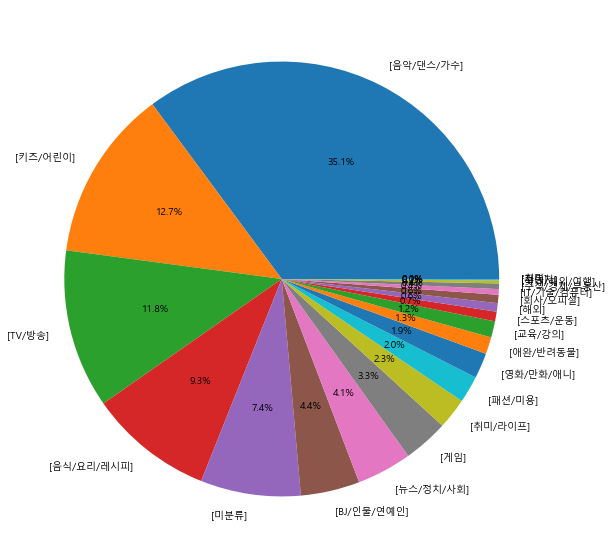

In [50]:
## 카테고리별 구독자수 시각화
plt.figure(figsize = (30,10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'],autopct='%1.1f%%')
plt.show()

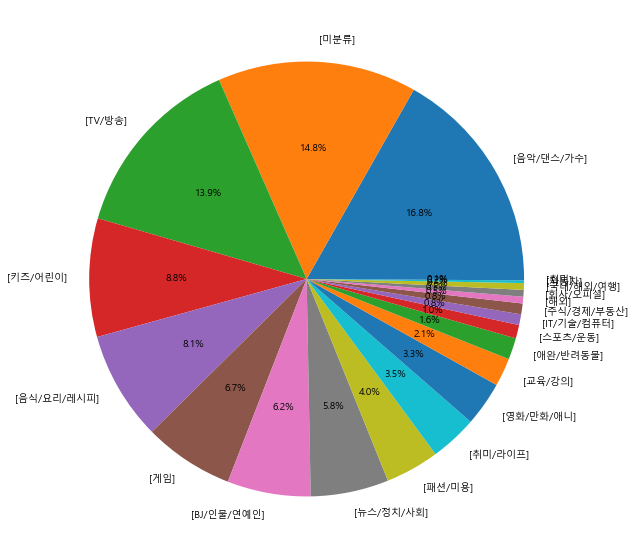

In [52]:
## 카테고리별 카테고리개수 시각화
pivot_df = pivot_df.sort_values(by='category_count',ascending=False)
plt.figure(figsize = (30,10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'],autopct='%1.1f%%')
plt.show()